### PART A.

In [2]:
#Import libraries.
import os
import numpy as np
from numpy import argmax
import pandas as pd
import matplotlib.pyplot as plt
import missingno as ms
import seaborn as sns
import statsmodels.api as sm 
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import sklearn.discriminant_analysis as DA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from xgboost import plot_importance
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Set working directory. 
os.chdir("C:/Users/alexm/OneDrive/Desktop/UCLA Data Science Certification/Week 2/Script & Data Week 2")

In [4]:
#Import homeprice data set.
homeprice = pd.read_excel('W02b_homeprice.xlsx')

In [5]:
print(homeprice.head())

                 MSA (Metropolitan Statistical Area)  homepriceg  bpo_pop03  \
0        Abilene, TX (Metropolitan Statistical Area)        66.3        3.4   
1          Akron, OH (Metropolitan Statistical Area)        28.6        5.8   
2         Albany, GA (Metropolitan Statistical Area)        45.4        6.8   
3  Albany-Schenectady-Troy, NY (Metropolitan Stat...        86.6        4.6   
4    Albuquerque, NM (Metropolitan Statistical Area)        49.4       11.7   

   pincomeg   chci  jante  ocean  unaval   pop03  
0     108.8  126.0   44.0      0     2.0  158810  
1      75.9  133.1   26.0      0     6.5  701139  
2      77.3  124.1   51.0      0    12.7  156914  
3      98.5  136.1   25.0      0    23.3  844619  
4     111.6  131.2   35.0      0    11.6  772128  


In [7]:
print(homeprice.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   MSA (Metropolitan Statistical Area)  245 non-null    object 
 1   homepriceg                           245 non-null    float64
 2   bpo_pop03                            245 non-null    float64
 3   pincomeg                             245 non-null    float64
 4   chci                                 245 non-null    float64
 5   jante                                245 non-null    float64
 6   ocean                                245 non-null    int64  
 7   unaval                               245 non-null    float64
 8   pop03                                245 non-null    int64  
dtypes: float64(6), int64(2), object(1)
memory usage: 17.4+ KB
None


In [8]:
homeprice = homeprice.rename(columns = {'MSA (Metropolitan Statistical Area)': 'MSA'})

In [9]:
print(homeprice.describe())

       homepriceg   bpo_pop03    pincomeg        chci       jante       ocean  \
count  245.000000  245.000000  245.000000  245.000000  245.000000  245.000000   
mean    63.760816    9.411429  109.571429  129.966939   35.578776    0.155102   
std     25.002772    5.677229   32.240550    5.638459   12.767847    0.362743   
min      1.300000    1.800000   27.600000  109.000000    6.000000    0.000000   
25%     47.900000    5.500000   88.700000  126.800000   25.700000    0.000000   
50%     61.500000    8.300000  107.800000  130.200000   33.000000    0.000000   
75%     75.300000   12.000000  130.000000  133.100000   45.000000    0.000000   
max    149.500000   39.700000  215.800000  146.900000   68.000000    1.000000   

           unaval         pop03  
count  245.000000  2.450000e+02  
mean    25.187755  8.926241e+05  
std     20.912086  1.804732e+06  
min      0.500000  6.824600e+04  
25%      9.100000  1.842540e+05  
50%     18.500000  3.524110e+05  
75%     38.000000  7.222740e+05 

            homepriceg  bpo_pop03  pincomeg      chci     jante     ocean  \
homepriceg    1.000000  -0.169263  0.221915  0.345146  0.000297  0.429371   
bpo_pop03    -0.169263   1.000000  0.622337  0.108032  0.304514  0.138244   
pincomeg      0.221915   0.622337  1.000000  0.029674  0.371005  0.152750   
chci          0.345146   0.108032  0.029674  1.000000 -0.386540  0.157209   
jante         0.000297   0.304514  0.371005 -0.386540  1.000000  0.341931   
ocean         0.429371   0.138244  0.152750  0.157209  0.341931  1.000000   
unaval        0.379212   0.085852  0.016972  0.076813  0.320524  0.565540   
pop03         0.246449  -0.039654  0.044817  0.108757  0.114709  0.312211   

              unaval     pop03  
homepriceg  0.379212  0.246449  
bpo_pop03   0.085852 -0.039654  
pincomeg    0.016972  0.044817  
chci        0.076813  0.108757  
jante       0.320524  0.114709  
ocean       0.565540  0.312211  
unaval      1.000000  0.107429  
pop03       0.107429  1.000000  


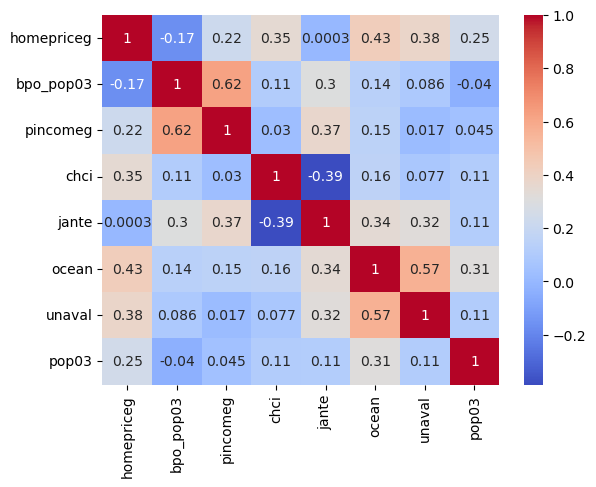

In [10]:
#Plot a correlation chart for all variables in homeprice data set.
cor = homeprice.corr()
print(cor)

sns.heatmap(cor, annot = True, cmap = 'coolwarm') #colorize correlation chart.
plt.show() #The pincomeg and bpo_pop03 variables have a correlation coefficient of 0.62.
#The unaval and ocen variables have a correlation coefficient of 0.57.

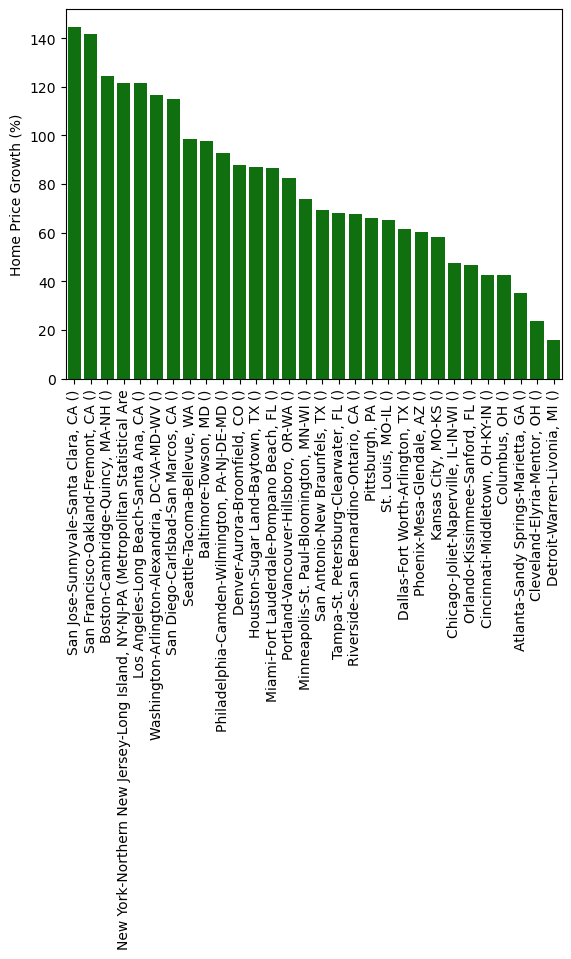

In [49]:
#Replicate Figures 1 and 5 from the "R02_What Predicts the Long-term Home Price Appreciation of a City?" article. 

#Plot Figure 1.

big_cities = homeprice.sort_values('pop03', ascending = False)[:30]
big_cities['MSA'] = big_cities['MSA'].str.replace('Metropolitan Statistical Area', '')
sns.barplot(x = "MSA", y = "homepriceg", data = big_cities, color = "g", order = big_cities.sort_values('homepriceg', ascending = False).MSA)
plt.xlabel("")
plt.ylabel("Home Price Growth (%)", size = 10)
plt.xticks(fontsize = 10, rotation = 90)
plt.yticks(fontsize = 10)
plt.show()

#NOTE: I DIDN"T KNOW HOW TO PLOT THIS CHART ACCORDING TO 30 LARGEST METROPOLITAN AREAS SO I DID IT BY POPULATION SIZE.

In [ ]:
#Plot Figure 5.
sns.lmplot(x = "unaval", y = "homepriceg", data = homeprice, line_kws={'color': 'red'}, ci = None)
plt.xlabel("Undevelopable Area (%)")
plt.ylabel("Home Price Growth (%)")
plt.title("Correlation Between Home Price Growth and Undevelopable Area of A City")
plt.show()

In [ ]:
#Replicate the linear regression model shown in Table 2 of the article.
x = homeprice[['bpo_pop03', 'pincomeg', 'chci', 'jante', 'ocean', 'unaval', 'pop03']]
y = homeprice['homepriceg']
X = sm.add_constant(x)
eq01 = sm.OLS(y, X).fit()
print(eq01.summary()) #Adjusted R^2 is 0.535. 

In [ ]:
#Make in-sample prediction of the linear regression model. 
pred01 = eq01.predict(X)
print(pred01) #Predictions match Yhat values calculated in the "matrix_multiplication" tab in the W02b data file.

### PART B.

In [30]:
#Set working directory. 
os.chdir("C:/Users/alexm/OneDrive/Desktop/UCLA Data Science Certification/Week 4/Script & Data Week 4/Script & Data Week 4")

#Import churn data set. 
churn = pd.read_csv('W04a_churn.csv')

In [31]:
print(churn.head())
print(churn.info())
print(churn.describe())
print(churn.shape)

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [32]:
#Data Cleaning. 
print(churn.isna().sum()) #0 missing values in TotalCharges.
print(churn.duplicated().sum()) #No duplicated values.

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
0


In [33]:
#Change TotalCharges variable to numeric type.
print(churn.nunique()) #High number of unique values denote continuous data (vs. categorical data).
churn.TotalCharges = pd.to_numeric(churn.TotalCharges, errors = 'coerce')
print(churn.isna().sum()) #Now there are 11 missing values in TotalCharges.
churn = churn.dropna()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Ch

In [34]:
#Change SeniorCitizen to categorical type.
churn['SeniorCitizen'] = churn['SeniorCitizen'].astype('object')

In [35]:
#Drop customerID variable. 
churn.drop(labels = 'customerID', axis = 1, inplace = True) #inplace = True ensures change is permanent in the dataframe.

Text(0.5, 1.0, 'Churn Percentage')

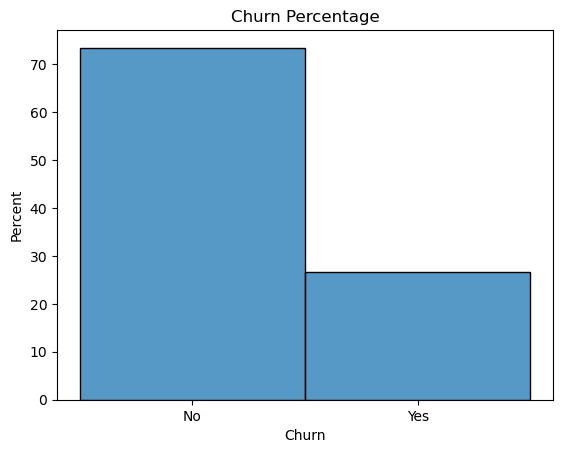

In [36]:
#Exploratory Data Analysis.

#Churn percentage.
sns.histplot(data = churn, x = 'Churn', stat = 'percent')
plt.title('Churn Percentage')

Text(0.5, 0.98, 'Churn Against Categorical Variable Plots')

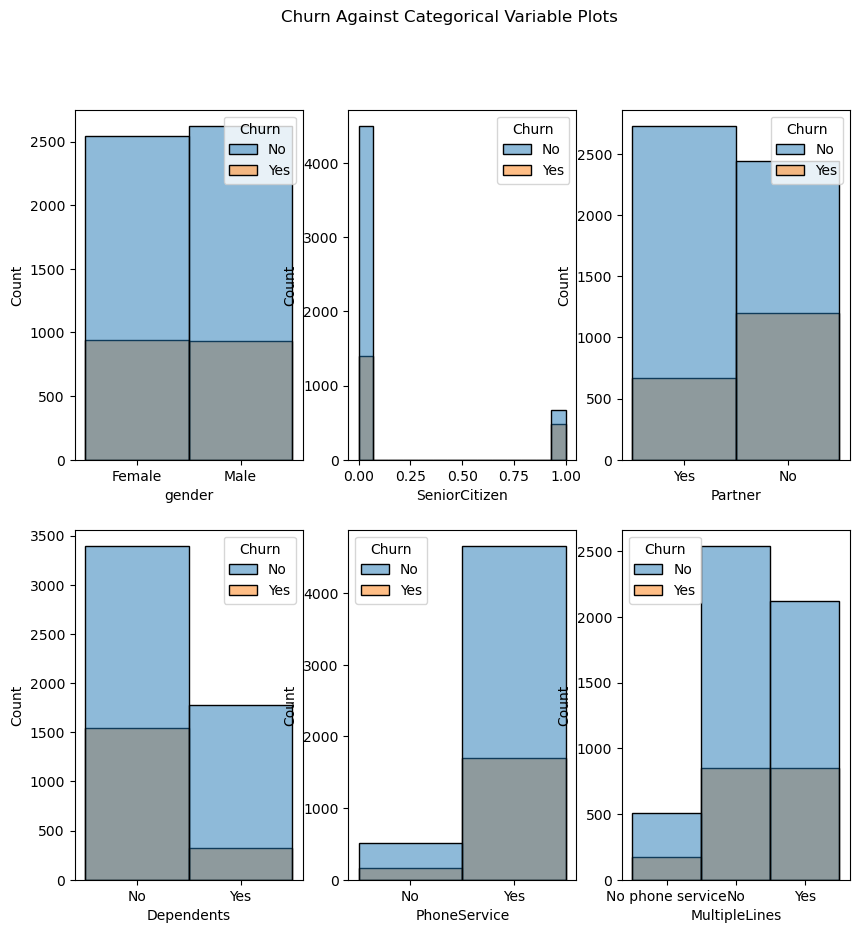

In [37]:
#Churn against categorical variables. 
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
sns.histplot(data = churn, x = "gender", hue = 'Churn', ax = axes[0, 0])
sns.histplot(data = churn, x = "SeniorCitizen", hue = 'Churn', ax = axes[0, 1])
sns.histplot(data = churn, x = "Partner", hue = 'Churn', ax = axes[0, 2])
sns.histplot(data = churn, x = "Dependents", hue = 'Churn', ax = axes[1, 0])
sns.histplot(data = churn, x = "PhoneService", hue = 'Churn', ax = axes[1, 1])
sns.histplot(data = churn, x = "MultipleLines", hue = 'Churn', ax = axes[1, 2])
fig.suptitle("Churn Against Categorical Variable Plots")

Text(0.5, 0.98, 'Churn Against Categorical Variable Plots')

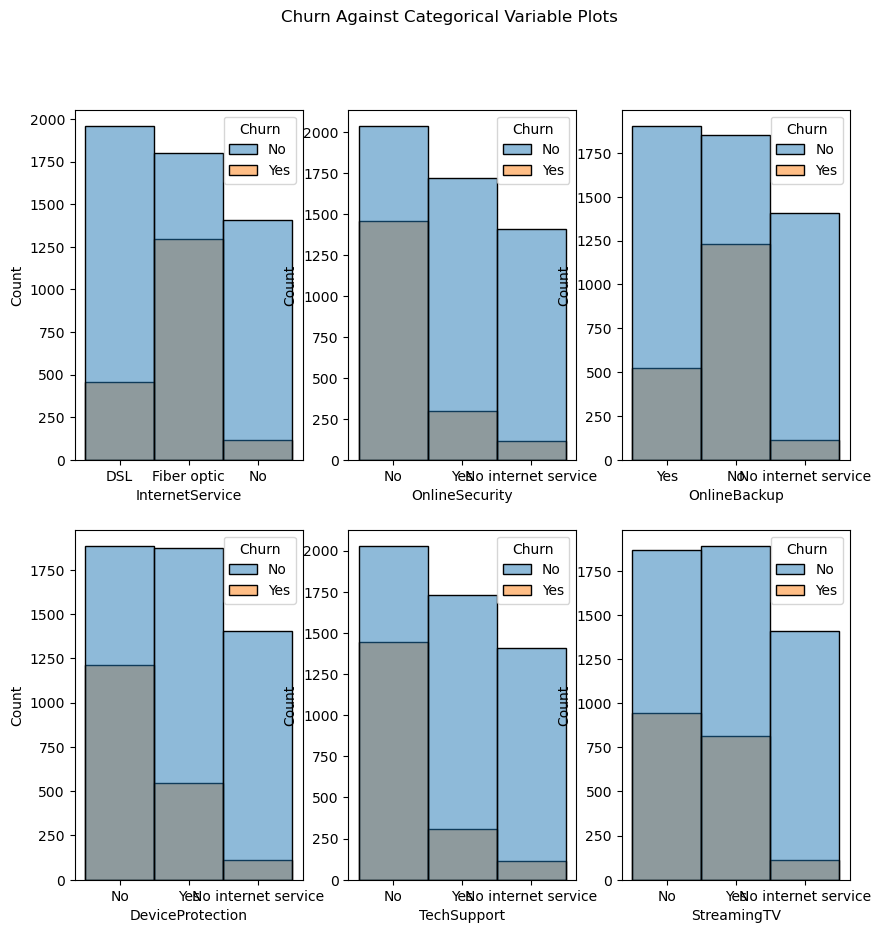

In [38]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (10, 10))
sns.histplot(data = churn, x = "InternetService", hue = 'Churn', ax = axes[0, 0])
sns.histplot(data = churn, x = "OnlineSecurity", hue = 'Churn', ax = axes[0, 1])
sns.histplot(data = churn, x = "OnlineBackup", hue = 'Churn', ax = axes[0, 2])
sns.histplot(data = churn, x = "DeviceProtection", hue = 'Churn', ax = axes[1, 0])
sns.histplot(data = churn, x = "TechSupport", hue = 'Churn', ax = axes[1, 1])
sns.histplot(data = churn, x = "StreamingTV", hue = 'Churn', ax = axes[1, 2])
fig.suptitle("Churn Against Categorical Variable Plots")

Text(0.5, 0.98, 'Churn Against Categorical Variable Plots')

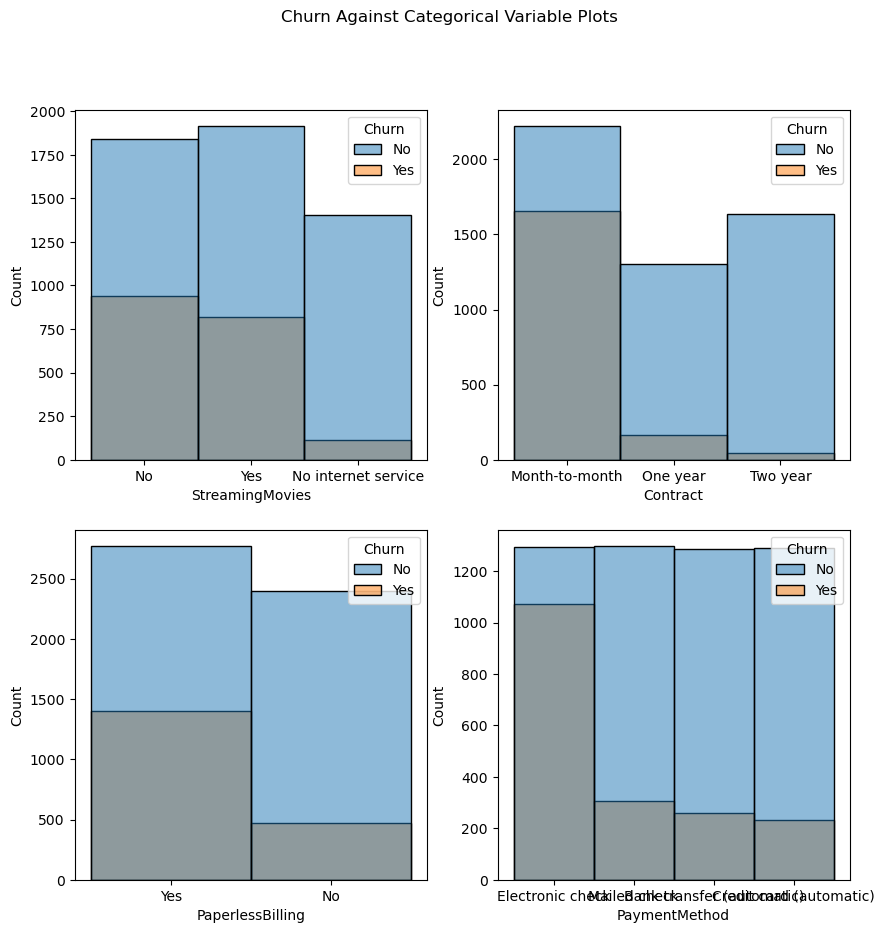

In [39]:
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (10, 10))
sns.histplot(data = churn, x = "StreamingMovies", hue = 'Churn', ax = axes[0, 0])
sns.histplot(data = churn, x = "Contract", hue = 'Churn', ax = axes[0, 1])
sns.histplot(data = churn, x = "PaperlessBilling", hue = 'Churn', ax = axes[1, 0])
sns.histplot(data = churn, x = "PaymentMethod", hue = 'Churn', ax = axes[1, 1])
fig.suptitle("Churn Against Categorical Variable Plots")

Text(0.5, 0.98, 'Churn Against Numeric Variable Plots')

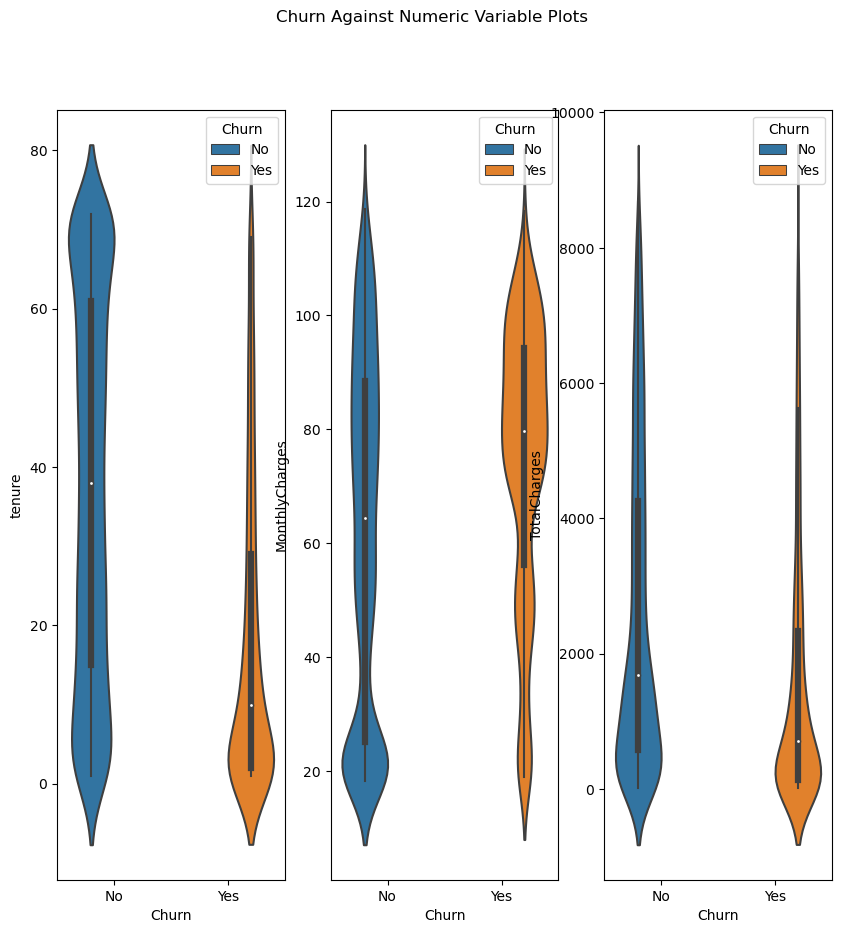

In [40]:
#Churn against numeric variables. 
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (10, 10))
sns.violinplot(data = churn, x = "Churn", y = "tenure", hue = "Churn", ax = axes[0])
sns.violinplot(data = churn, x = "Churn", y = "MonthlyCharges", hue = "Churn", ax = axes[1])
sns.violinplot(data = churn, x = "Churn", y = "TotalCharges", hue = "Churn", ax = axes[2])
fig.suptitle("Churn Against Numeric Variable Plots")

In [41]:
#Run logistic regression models for the churn data set.

#Convert categorical variables to dummy variables before running models.
cat_cols = [col for col in churn.columns if churn[col].dtype == 'object'] #Get categorical columns in churn data set.
cat_cols.remove("Churn")
dummies = pd.get_dummies(churn[cat_cols], drop_first = True) #Turn categorical variables into dummy variables.
churn = pd.concat([churn, dummies], axis = 1) #Concatenate churn data set with dummy variables.
churn.drop(columns = cat_cols, inplace = True) #Drop original categorical columns from data set. 

In [42]:
churn['Churn'] = churn['Churn'].apply(lambda x: 1 if x == 'Yes' else 0) #Change Churn variable to a binary variable of integer type.

In [43]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   tenure                                 7032 non-null   int64  
 1   MonthlyCharges                         7032 non-null   float64
 2   TotalCharges                           7032 non-null   float64
 3   Churn                                  7032 non-null   int64  
 4   gender_Male                            7032 non-null   uint8  
 5   SeniorCitizen_1                        7032 non-null   uint8  
 6   Partner_Yes                            7032 non-null   uint8  
 7   Dependents_Yes                         7032 non-null   uint8  
 8   PhoneService_Yes                       7032 non-null   uint8  
 9   MultipleLines_No phone service         7032 non-null   uint8  
 10  MultipleLines_Yes                      7032 non-null   uint8  
 11  Inte

In [69]:
y1 = churn['Churn']
x1 = churn.drop(['Churn'], axis = 1) #Run all independent variables.
X1 = sm.add_constant(x1)
logit = sm.Logit(y1, X1)
eq02 = logit.fit()
print(eq02.summary()) #Pseudo R^2 is 0.2845. 

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.2845
Time:                        16:15:31   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.8340      

In [70]:
y2 = churn['Churn']
x2 = churn.drop(['Churn', 'MonthlyCharges'], axis = 1) #Run all independent variables except for MonthlyCharges.
X2 = sm.add_constant(x2)
logit = sm.Logit(y2, X2)
eq03 = logit.fit()
print(eq03.summary()) #Pseudo R^2 is 0.2843.

Optimization terminated successfully.
         Current function value: 0.414383
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7009
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.2843
Time:                        16:15:36   Log-Likelihood:                -2913.9
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.1101      

In [71]:
y3 = churn['Churn']
x3 = churn.drop(['Churn', 'TotalCharges'], axis = 1) #Run all independent variables except for TotalCharges.
X3 = sm.add_constant(x3)
logit = sm.Logit(y3, X3)
eq04 = logit.fit()
print(eq04.summary()) #Pseudo R^2 is 0.2817.

Optimization terminated successfully.
         Current function value: 0.415889
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7009
Method:                           MLE   Df Model:                           22
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.2817
Time:                        16:15:43   Log-Likelihood:                -2924.5
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     0.4600      

In [72]:
y4 = churn['Churn']
x4 = churn.drop(['Churn', 'PhoneService_Yes'], axis = 1) #Run all independent variables except for PhoneService_Yes.
X4 = sm.add_constant(x4)
logit = sm.Logit(y4, X4)
eq05 = logit.fit()
print(eq05.summary()) #Pseudo R^2 is 0.2845. 

Optimization terminated successfully.
         Current function value: 0.414269
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:                  Churn   No. Observations:                 7032
Model:                          Logit   Df Residuals:                     7008
Method:                           MLE   Df Model:                           23
Date:                Mon, 27 Feb 2023   Pseudo R-squ.:                  0.2845
Time:                        16:15:48   Log-Likelihood:                -2913.1
converged:                       True   LL-Null:                       -4071.7
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     1.3368      

In [48]:
#The two best models I found were using all the independent variables and using all the independent variables except for PhoneService_Yes.
#For both of these models, I got a pseudo R^2 of 0.2845. These are saved in variables eq02 and eq05 respectively.

In [94]:
#Show in-sample predicted probability of churn for each sammple using default threshold of 0.5.

#Model 1:
pred01 = eq02.predict(X1)
pred01_b = np.where(pred01 >= 0.5, 1, 0)
print(pred01_b)

#Model 2:
pred02 = eq05.predict(X4)
pred02_b = np.where(pred02 >= 0.5, 1, 0)
print(pred02_b)

[1 0 0 ... 0 1 0]
[1 0 0 ... 0 1 0]


Confusion Matrix:
 [[4639  833]
 [ 524 1036]]


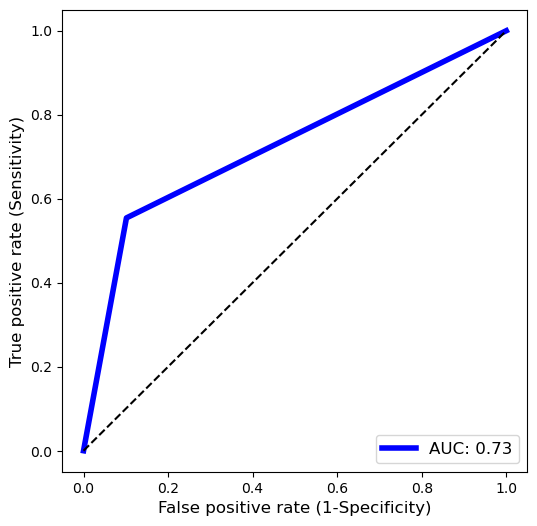

Accuracy: 0.807, Precision: 0.664, Recall: 0.554, F1: 0.604


In [103]:
#Show confusion matrix, ROC curve, accuracy, precision, recall, and F1 for both models.

#Model 1:
#Confusion matrix:
confusion1 = metrics.confusion_matrix(pred01_b, y1)
print('Confusion Matrix:\n', confusion1)

#ROC curve:
fpr, tpr, _ = metrics.roc_curve(y1, pred01_b)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth = 4, color = 'blue', label = "AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc = 4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

#Metrics:
accuracy = metrics.accuracy_score(y1, pred01_b)
precision = metrics.precision_score(y1, pred01_b)
recall = metrics.recall_score(y1, pred01_b)
f1 = metrics.f1_score(y1, pred01_b)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Confusion Matrix:
 [[4639  833]
 [ 524 1036]]


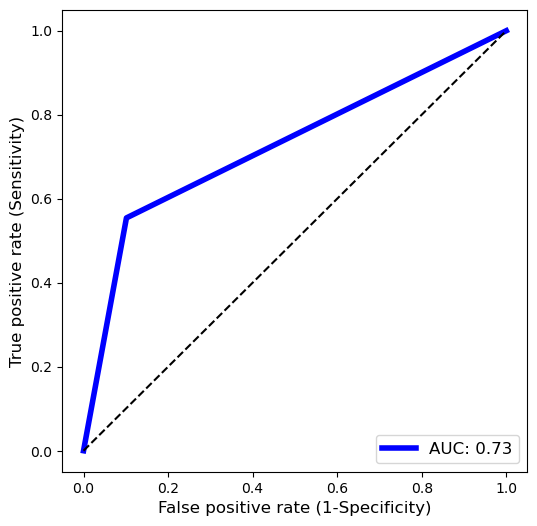

Accuracy: 0.807, Precision: 0.664, Recall: 0.554, F1: 0.604


In [104]:
#Model 2:
#Confusion matrix:
confusion1 = metrics.confusion_matrix(pred02_b, y4)
print('Confusion Matrix:\n', confusion1)

#ROC curve:
fpr, tpr, _ = metrics.roc_curve(y4, pred02_b)
auc = metrics.auc(fpr, tpr)
plt.figure(figsize = (6,6))
plt.plot(fpr,tpr, linewidth = 4, color = 'blue', label = "AUC: %0.2f" % auc)
plt.plot([0, 1], [0, 1], 'k--')  # 45 degree line
plt.legend(loc = 4, fontsize = 12)
plt.ylabel("True positive rate (Sensitivity)", fontsize = 12)
plt.xlabel("False positive rate (1-Specificity)",fontsize = 12)
plt.show()

#Metrics:
accuracy = metrics.accuracy_score(y4, pred02_b)
precision = metrics.precision_score(y4, pred02_b)
recall = metrics.recall_score(y4, pred02_b)
f1 = metrics.f1_score(y4, pred02_b)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

In [121]:
#Find optimizing threshold based on F1 score for the 2 models. Use new thresholds to redo prediction and show the recall and F1 scores.

#Model 1:
probs1 = pred01_b == 1
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y, to_labels(probs1, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

pred01_1 = list(map(lambda x: 1 if x > 0.001 else 0, probs))
accuracy = metrics.accuracy_score(y1, pred01_1)
precision = metrics.precision_score(y1, pred01_1)
recall = metrics.recall_score(y1, pred01_1)
f1 = metrics.f1_score(y1, pred01_1)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Optimal Threshold = 0.001, F1-Score = 0.6043
Accuracy: 0.807, Precision: 0.664, Recall: 0.554, F1: 0.604


In [122]:
#Model 2:
probs2 = pred02_b == 1
thresholds = np.arange(0, 1, 0.001) 
def to_labels(pos_probs, threshold):
    return (pos_probs >= threshold).astype('int')
scores = [f1_score(y, to_labels(probs2, t)) for t in thresholds]
ix = argmax(scores)
print('Optimal Threshold = %.3f, F1-Score = %.4f' % (thresholds[ix], scores[ix]))

pred02_1 = list(map(lambda x: 1 if x > 0.001 else 0, probs))
accuracy = metrics.accuracy_score(y4, pred02_1)
precision = metrics.precision_score(y4, pred02_1)
recall = metrics.recall_score(y4, pred02_1)
f1 = metrics.f1_score(y4, pred02_1)
print(f'Accuracy: {accuracy:.3f}, Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}')

Optimal Threshold = 0.001, F1-Score = 0.6043
Accuracy: 0.807, Precision: 0.664, Recall: 0.554, F1: 0.604


# PART C.

In [2]:
#Import data set.
os.chdir("C:/Users/alexm/OneDrive/Desktop/UCLA Data Science Certification/Week 6/Script & Data Week 6")
titanic = pd.read_csv('Y03_titanic.csv')
print(titanic.head())
print(titanic.info())
print(titanic.describe())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
<c

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


<AxesSubplot:>

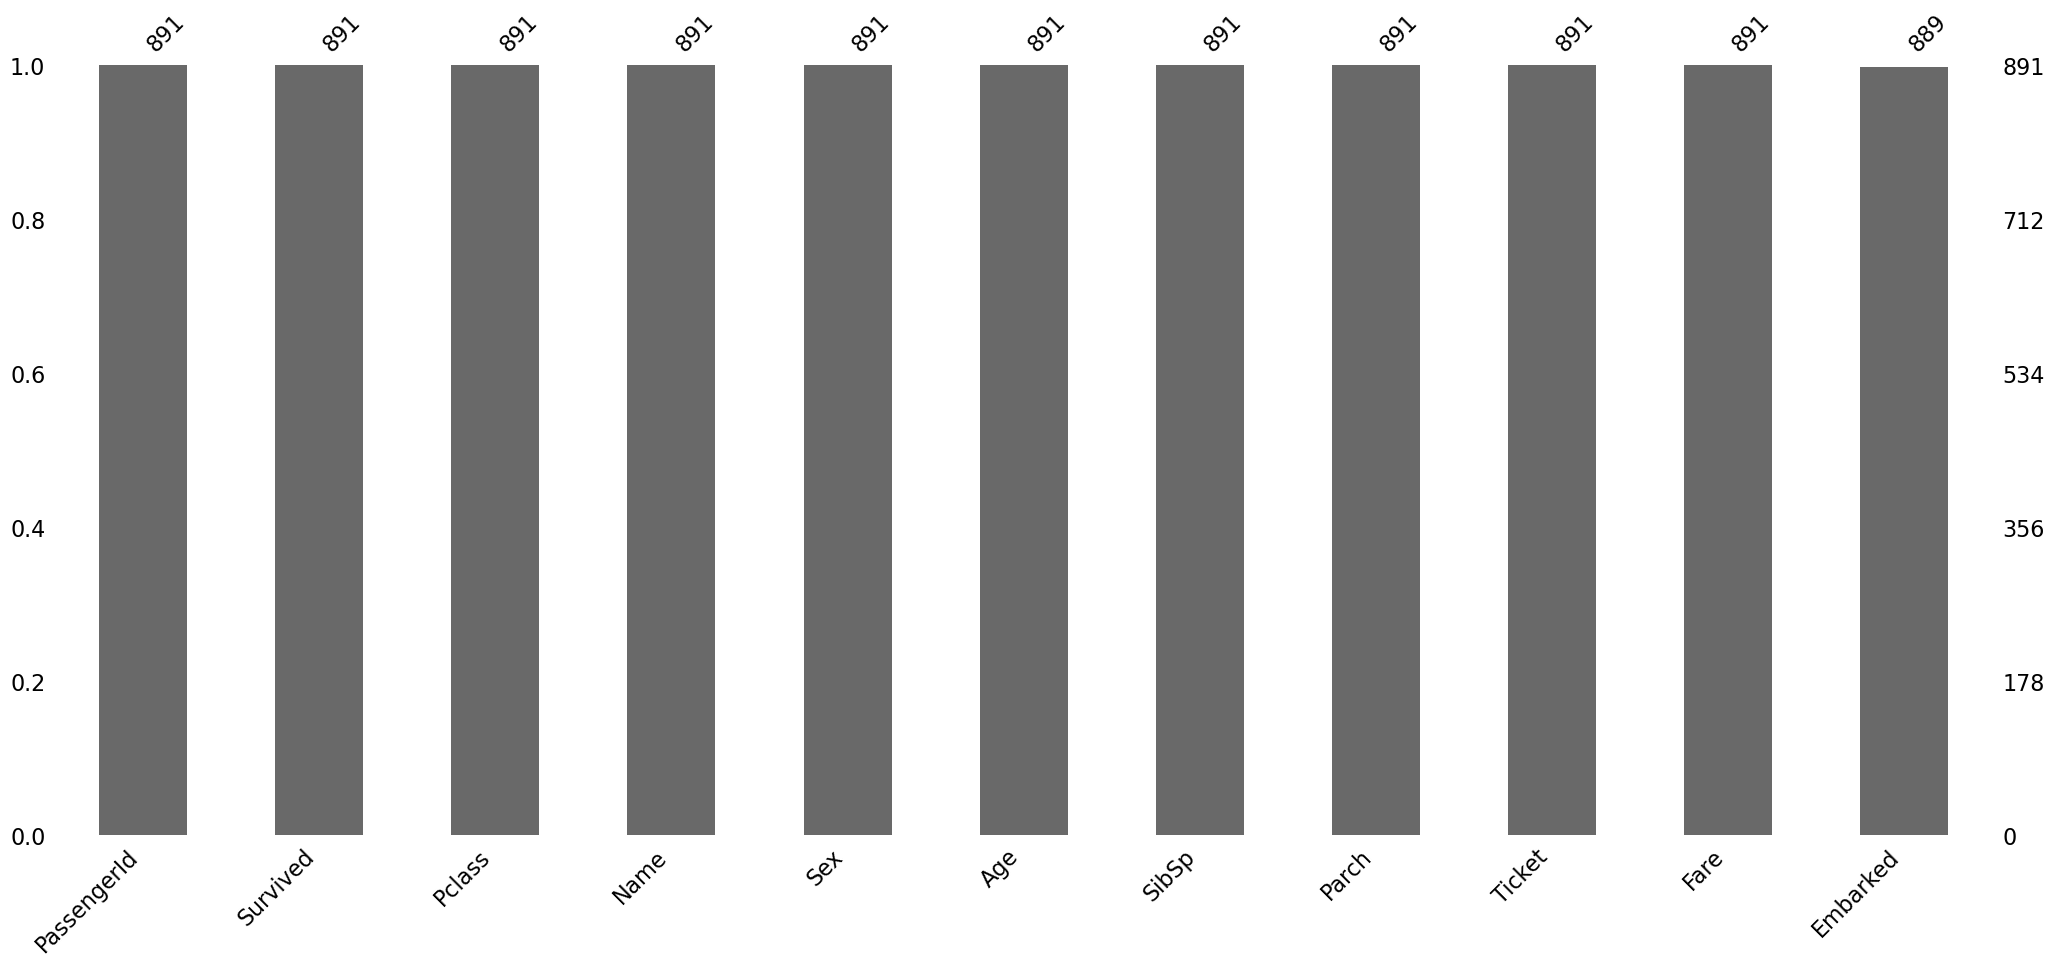

In [3]:
#Missing data management.
print(titanic.isna().sum())
titanic1 = titanic.drop("Cabin", axis = 1) #Delete Cabin variable due to high percentage of missing values.
titanic2 = titanic1.interpolate(method = 'linear') #Impute missing values in Age variable (can't due Embarked variable because it's categorical).
ms.bar(titanic2)

In [4]:
#Change object type variables in order to run XGBClassifier model.
titanic2['Sex'] = titanic2['Sex'].apply(lambda x: 1 if x == 'male' else 0)
titanic2['Embarked'] = titanic2['Embarked'].apply(lambda x: 0 if x == 'c' else (1 if x =='Q' else 2))
titanic2['Name'] = titanic2['Name'].astype('category')
titanic2['Ticket'] = titanic2['Ticket'].astype('category')

In [5]:
titanic2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    int64   
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 127.0 KB


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

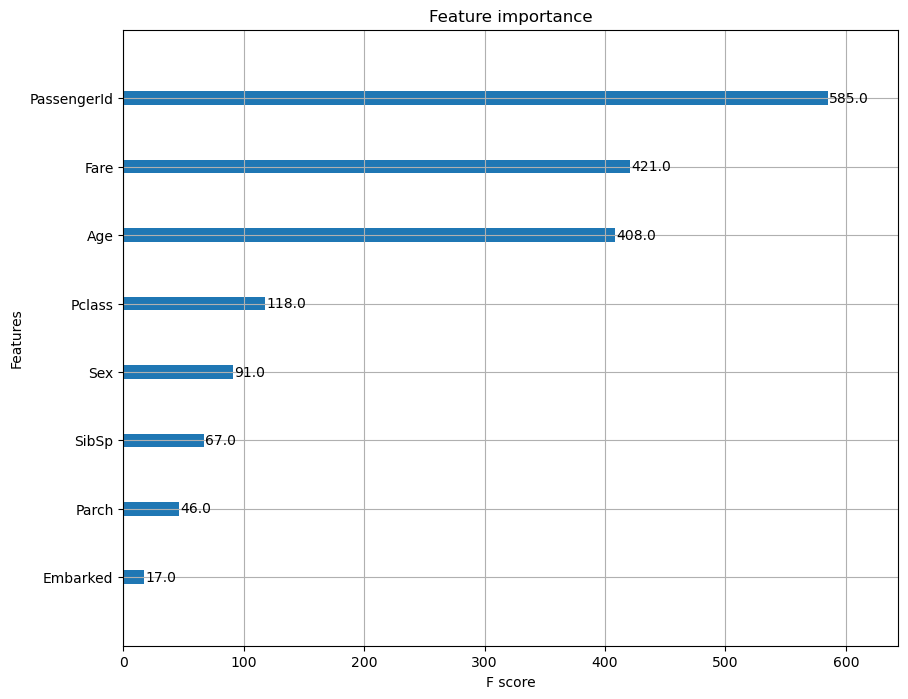

In [16]:
#Run XGBClassifier model and plot feature importance chart for XGBClassifier model.
y5 = titanic2['Survived']
X5 = titanic2.drop(['Survived', 'Name', 'Ticket'], axis = 1) 

X_train, X_test, y_train, y_test = train_test_split(X5, y5, test_size=0.3, random_state=40)
xgb01 = xgb.XGBRegressor(max_depth=5, learning_rate=0.08)
xgb01.fit(X_train, y_train)
pred07 = xgb01.predict(X_test)


fig, ax = plt.subplots(figsize = (10,8))
plot_importance(xgb01, ax = ax)

In [17]:
#Run Logit, NBayes, LDA, QDA, KNN, SVM, Tree, and RF models on Titanic data using 10-fold CV.
#Show F1, kappa, accuracy, recall, and AUC for all of the models.

y6 = titanic2['Survived'] 
X6 = titanic2.drop(columns = ['Survived', 'Name', 'Ticket'])

sc = StandardScaler()
sc.fit(X5)
X6 = sc.transform(X6)

X_train, X_test, y_train, y_test = train_test_split(X6, y6, test_size = 0.3, random_state = 40)

names = ["Logit","NBayes", "LDA", "QDA", "KNN", "SVM", "Tree", "RF", "XGB"] 

classifiers = [LogisticRegression(C=1e5), 
               GaussianNB(), 
               DA.LinearDiscriminantAnalysis(), 
               DA.QuadraticDiscriminantAnalysis(), 
               KNeighborsClassifier(n_neighbors=5), 
               SVC(kernel='linear', C=1.0, random_state = 20),
               tree.DecisionTreeClassifier(random_state=20),
               RandomForestClassifier(n_estimators=3, random_state=20),
               xgb.XGBClassifier(max_depth=5, learning_rate=0.08, objective= 'binary:logistic')]

print('Model  CV    F1    Kappa Accur Recall AUC\n'+46*'-') 
for name , clf in zip(names , classifiers): 
    clf.fit(X_train , y_train) 
    y_pred = clf.predict(X_test)

    kfold = KFold(n_splits=10, random_state=42, shuffle=True)
    cv = cross_val_score(clf, X6, y6, scoring='roc_auc', cv=kfold)
    cv_mean = cv.mean()    

    fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
    auc = metrics.auc(fpr, tpr)

    print('{:6} {:3.3f} {:3.3f} {:3.3f} {:3.3f} {:3.3f} {:3.3f}'.format(name, cv_mean, 
                                     metrics.f1_score(y_test, y_pred),
                                     metrics.cohen_kappa_score(y_test,y_pred),
                                     metrics.accuracy_score(y_test,y_pred),
                                     metrics.recall_score(y_test, y_pred),
                                     auc))

Model  CV    F1    Kappa Accur Recall AUC
----------------------------------------------
Logit  0.849 0.771 0.608 0.810 0.768 0.804
NBayes 0.829 0.763 0.588 0.799 0.777 0.795
LDA    0.849 0.762 0.593 0.802 0.759 0.796
QDA    0.849 0.784 0.631 0.821 0.777 0.815
KNN    0.819 0.777 0.634 0.825 0.732 0.812
SVM    0.808 0.742 0.561 0.787 0.732 0.780
Tree   0.739 0.685 0.473 0.746 0.661 0.734
RF     0.799 0.686 0.485 0.754 0.643 0.738
XGB    0.863 0.783 0.642 0.828 0.741 0.816


In [ ]:
#The machine learning model with the highest CV is the xGBClassifier model. The CV is 0.863.